In [ ]:
#Problem Statement:  Explore the effect of regularization techniques (L2 regularization, dropout) on a neural network trained on the CIFAR-10 dataset. Compare the model's performance with and without regularization and discuss how these techniques help in preventing overfitting.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 148s 1us/step


In [2]:
def create_baseline_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [3]:
def create_l2_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
def create_dropout_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    
    # Add Dropout layer after flattening
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))  # Add Dropout before the output layer
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


C:\Users\vedan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Baseline Model:
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3334 - loss: 1.8056 - val_accuracy: 0.5033 - val_loss: 1.3588
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5300 - loss: 1.3139 - val_accuracy: 0.5693 - val_loss: 1.2000
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6030 - loss: 1.1234 - val_accuracy: 0.6127 - val_loss: 1.0952
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6417 - loss: 1.0197 - val_accuracy: 0.6350 - val_loss: 1.0219
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6717 - loss: 0.9330 - val_accuracy: 0.6624 - val_loss: 0.9591
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6995 - loss: 0.8648 - val_accuracy: 0.6768 - val_loss: 0.9224
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7197 - loss: 0.8132 - val_accuracy: 0.6893 - val_loss: 0.8884
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy:

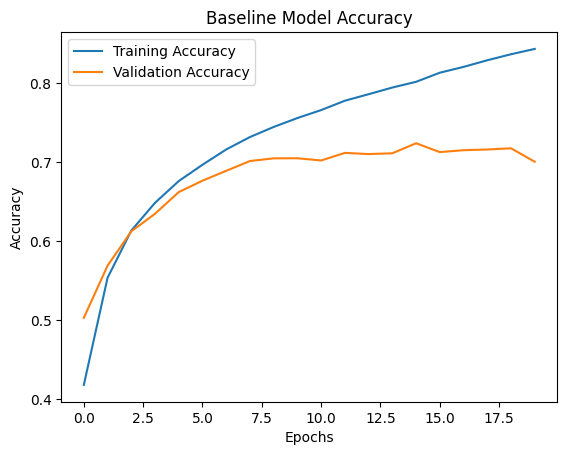

Training L2-Regularized Model:
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.2958 - loss: 1.9710 - val_accuracy: 0.4604 - val_loss: 1.5769
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4955 - loss: 1.4720 - val_accuracy: 0.5321 - val_loss: 1.3944
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5529 - loss: 1.3569 - val_accuracy: 0.5834 - val_loss: 1.2906
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5959 - loss: 1.2560 - val_accuracy: 0.6072 - val_loss: 1.2549
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6242 - loss: 1.1916 - val_accuracy: 0.6167 - val_loss: 1.2031
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6493 - loss: 1.1402 - val_accuracy: 0.6488 - val_loss: 1.1511
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6617 - loss: 1.1014 - val_accuracy: 0.6467 - val_loss: 1.1452
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - acc

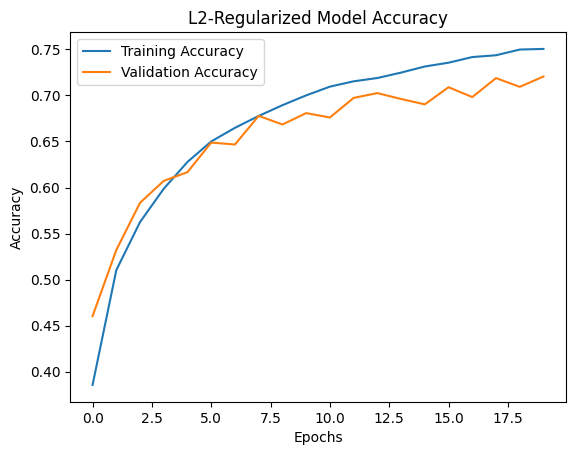

Training Dropout Model:
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.2674 - loss: 1.9581 - val_accuracy: 0.4909 - val_loss: 1.4155
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4591 - loss: 1.4862 - val_accuracy: 0.5640 - val_loss: 1.2324
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5228 - loss: 1.3372 - val_accuracy: 0.5969 - val_loss: 1.1389
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5573 - loss: 1.2516 - val_accuracy: 0.6307 - val_loss: 1.0615
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5849 - loss: 1.1767 - val_accuracy: 0.6339 - val_loss: 1.0377
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6123 - loss: 1.1092 - val_accuracy: 0.6478 - val_loss: 0.9998
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.6317 - loss: 1.0583 - val_accuracy: 0.6531 - val_loss: 1.0167
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 

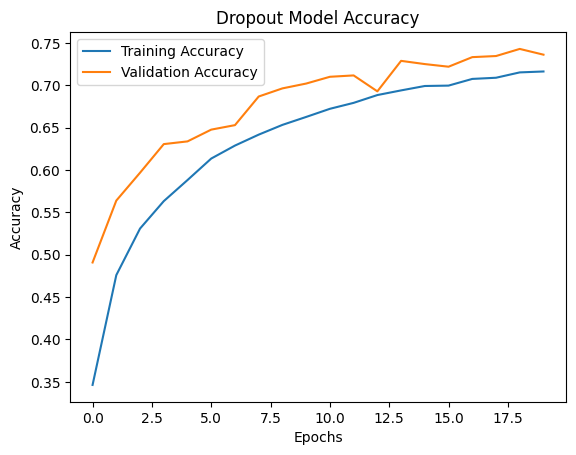

In [5]:
def train_and_evaluate(model, model_name, epochs=20):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=64)
    
    # Plot training & validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return history

# Create and train baseline model
baseline_model = create_baseline_model()
print("Training Baseline Model:")
train_and_evaluate(baseline_model, "Baseline Model")

# Create and train L2-regularized model
l2_model = create_l2_model()
print("Training L2-Regularized Model:")
train_and_evaluate(l2_model, "L2-Regularized Model")

# Create and train Dropout model
dropout_model = create_dropout_model()
print("Training Dropout Model:")
train_and_evaluate(dropout_model, "Dropout Model")
